In [12]:
# set.seed(42)

library(cluster)
library(mclust)

source("../R/dbscan.R")
dbscan <- DBSCAN$new(eps = 0.5)

n <- 100
X1 <- matrix(rnorm(n * 3, mean = 0, sd = 0.3), ncol = 3)
X2 <- matrix(rnorm(n * 3, mean = 3, sd = 0.3), ncol = 3)
X3 <- matrix(rnorm(n * 3, mean = 6, sd = 0.3), ncol = 3)
X <- rbind(X1, X2, X3)
true_labels <- c(rep(1, n), rep(2, n), rep(3, n))
dbscan$fit(X)

dbscan$compute_silhouette_score() - mean(silhouette(dbscan$get_labels(), dist(X))[,"sil_width"])
dbscan$compute_adjusted_rand_index(true_labels) - adjustedRandIndex(dbscan$get_labels(), true_labels)
dbscan$compute_noise_ratio()

[1] -1.110223e-16

[1] 0

[1] 0.01333333

In [34]:
# set.seed(42)

library(cluster)
library(mclust)

source("../R/dbscan.R")


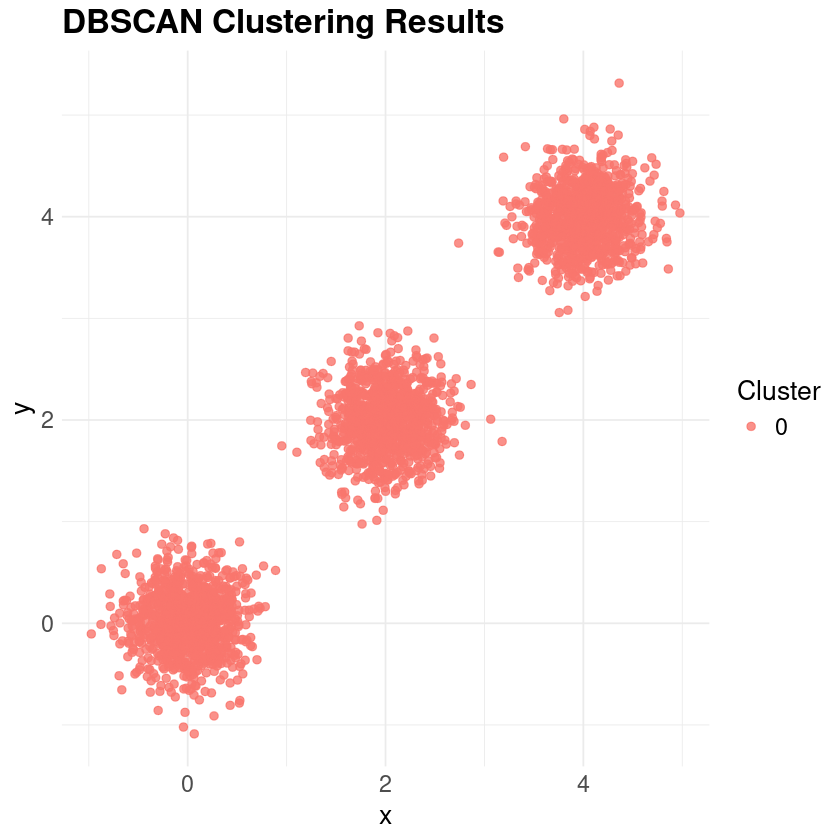

In [46]:
dbscan <- DBSCAN$new(eps = 1)
n <- 1000
# Generate 2D data
set.seed(817)
X1 <- matrix(rnorm(n * 2, mean = 0, sd = 0.3), ncol = 2)
X2 <- matrix(rnorm(n * 2, mean = 2, sd = 0.3), ncol = 2)
X3 <- matrix(rnorm(n * 2, mean = 4, sd = 0.3), ncol = 2)
X <- rbind(X1, X2, X3)
true_labels <- c(rep(1, n), rep(2, n), rep(3, n))
dbscan$fit(X)
dbscan$plot_clusters(X, col_names = c("x", "y"))

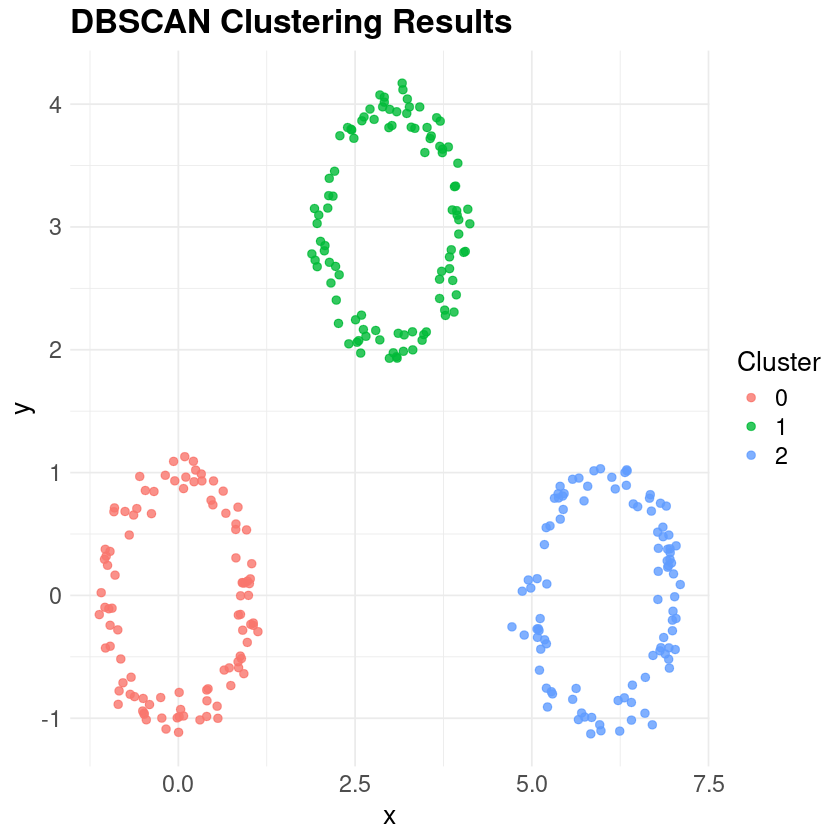

In [38]:
set.seed(42)
library(ggplot2)

n <- 100

# 生成圆形数据
generate_circle <- function(n, radius, center) {
  theta <- runif(n, 0, 2 * pi)
  x <- center[1] + radius * cos(theta) + rnorm(n, sd = 0.1)
  y <- center[2] + radius * sin(theta) + rnorm(n, sd = 0.1)
  return(cbind(x, y))
}

X1 <- generate_circle(n, 1, c(0, 0))
X2 <- generate_circle(n, 1, c(3, 3))
X3 <- generate_circle(n, 1, c(6, 0))
X <- rbind(X1, X2, X3)
true_labels <- c(rep(1, n), rep(2, n), rep(3, n))

dbscan$fit(X)
dbscan$plot_clusters(X, col_names = c("x", "y"))

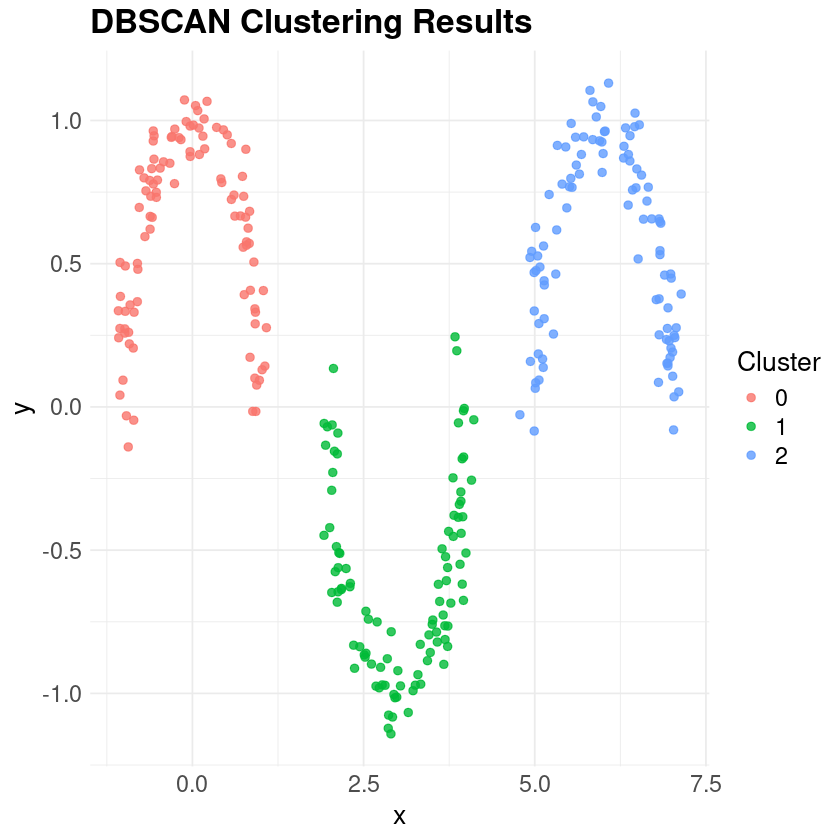

In [39]:
set.seed(42)

# 生成月牙形数据
generate_moon <- function(n, radius, center, flip = FALSE) {
  theta <- runif(n, 0, pi)
  x <- center[1] + radius * cos(theta) + rnorm(n, sd = 0.1)
  y <- center[2] + radius * sin(theta) + rnorm(n, sd = 0.1)
  if (flip) {
    y <- -y
  }
  return(cbind(x, y))
}

X1 <- generate_moon(n, 1, c(0, 0))
X2 <- generate_moon(n, 1, c(3, 0), flip = TRUE)
X3 <- generate_moon(n, 1, c(6, 0))
X <- rbind(X1, X2, X3)
true_labels <- c(rep(1, n), rep(2, n), rep(3, n))

dbscan$fit(X)
dbscan$plot_clusters(X, col_names = c("x", "y"))